ME200, Johannes Ruf and Luitgard Veraart

# Day 3: Basic statistics

## Simulating from the normal distribution

Let us simulate some normally distributed samples.

In [143]:
import numpy as np

In [153]:
sample_size = 10

In [154]:
mu = 1
std = 2

In [156]:
np.random.normal(size=sample_size, loc=mu, scale=std)

array([-0.07363123,  0.72715941,  0.26410899,  3.93772095, -1.93360537,
        1.3597026 ,  2.04343615,  1.37170974, -1.95366436, -0.06776402])

Note that we have to input the standard deviation, not the variance! Ignoring this is a common, disastrous coding error.

## Some scatter plots

Let’s first generate some uncorrelated standard normally distributed random variables and plot them:

In [158]:
sample_size = 500

In [166]:
X = np.random.normal(size=sample_size)    # without additional parameter works as random.standard_normal()
Y = np.random.normal(size=sample_size) 

In [167]:
import matplotlib.pyplot as plt

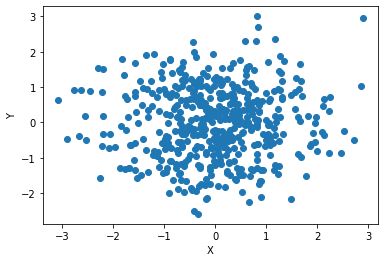

In [169]:
fig, ax = plt.subplots()
plt.scatter(X, Y);
plt.xlabel('X')
plt.ylabel('Y');

Note that the picture changes, as the code is run again. Indeed, all these numbers are **randomly** drawn from a standard normal distribution.

Let’s now plot some positive correlated standard normally distributed random variables:

In [170]:
rho = 0.6
tau = np.sqrt(1 - rho**2)

X = np.random.normal(size=sample_size)
W = np.random.normal(size=sample_size)
Y = rho * X + tau * W

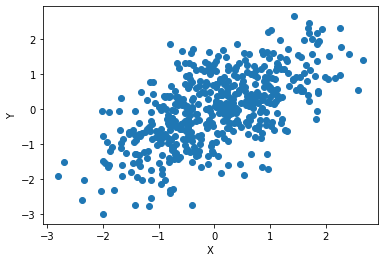

In [171]:
fig, ax = plt.subplots()
plt.scatter(X, Y);
plt.xlabel('X')
plt.ylabel('Y');

Now the Y-values and the X-values are not independent anymore.

## Sample means and variances

 * Often, we have data and want to *estimate* the mean and variance of the underlying distribution.
 * For example, we might know that the data are generated from a normal distribution, but we don’t know the parameters.
 * Suppose the daily closing price of your favorite stock for two weeks is 45, 43, 46, 48, 51, 46, 50, 47, 46, 45.
 * Then we can estimate the mean as follows:

In [172]:
x = np.array([45, 43, 46, 48, 51, 46, 50, 47, 46, 45])
x.mean()

46.7

 * To check how many data points we have:

In [175]:
x.size

10

 * Let’s add a week of observations:

In [177]:
x = np.append(x, [48, 49, 51, 50, 49])

In [178]:
x.mean()

47.6

In [179]:
x.size

15

 * To compute the sample variance

In [180]:
x.var()

5.439999999999999

 * This is the same as the following:

In [181]:
((x - x.mean())**2).mean()

5.439999999999999

* To get the sample standard deviation, use

In [182]:
x.var()**0.5

2.33238075793812

or

In [184]:
x.std()

2.33238075793812

 *  We can do a dummy check:
    1. First, we simulate data from a distribution.
    2. Then we check the sample mean and sample variance of the simulated data.
 * Let’s do this with the uniform distribution: U ∼ Unif(a,b):

In [ ]:
sample_size = 50

In [190]:
x = np.random.random(size=sample_size)

In [191]:
print(x.mean())
print(x.var())

0.5069744916701248
0.08740141438275272


Compare this with the theoretical values:

\begin{align*}
    E[U] &= \frac{1}{2};\\
    {\rm Var}[U] &= \frac{1}{12}.
\end{align*}

In [192]:
1/12

0.08333333333333333

## Sample covariance and correlation

* Let’s say we have two realizations of two different random vectors. We want to estimate whether these realizations are correlated with each other or not.
* This can be done as follows:

In [ ]:
sample_size = 100

In [201]:
X = np.random.normal(size=sample_size, loc=2, scale=0.5) 
Y = X + np.random.normal(size=sample_size)

In [202]:
np.cov(X, Y)

array([[0.24432469, 0.24562743],
       [0.24562743, 1.26404761]])

In [203]:
np.corrcoef(X, Y)

array([[1.        , 0.44198901],
       [0.44198901, 1.        ]])

* The off-diagonal elements are the sample covariance and correlation of X and Y.
* Here, Y is a noisy observation of X.
* However, keep in mind that correlation does not imply causation.